Construir Moduladores e Demoduladores em BP
Construir os seguintes moduladores e seus correspondentes demoduladores:

M - ASK; DQPSK; M-PSK e M-QAM.

Para cada um dos moduladores, apresentar o diagrama de constelação do sinal transmitido e recebido após ter passado por um canal awgn com possibilidade de variar a relação Sinal/Ruído.


# Imports


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
np.random.seed(40)  # semente para gerar os mesmos números aleatórios

# Constantes


In [3]:
n_simbolos = 1000
amostras_por_simbolo = 160
n_bits = 2
taxa_de_modulacao = 1000 #baud/s
taxa_de_transmissao = taxa_de_modulacao * n_bits #bps
frequencia_central = 500 # Hz
amplitude = 1 # Amplitudade da Portadora em Volts
periodo_de_amostragem = n_simbolos / taxa_de_modulacao / amostras_por_simbolo
frequencia_de_amostragem = 1 / periodo_de_amostragem

# plot
simbolos_no_grafico = 20
show_amostras = simbolos_no_grafico*amostras_por_simbolo
# vetores
tempo = np.linspace(0, n_simbolos / taxa_de_modulacao, n_simbolos * amostras_por_simbolo)

# Portadora


In [4]:
class Onda:
    T = tempo
    def __init__(self,amplitude,frequencia,fase=0) -> None:
        self.a = amplitude
        self.f = frequencia
        self.phase = fase
    
    @property
    def wave(self):
        return self.a*np.cos(2*np.pi*self.f*self.T + self.phase)

portadora = Onda(amplitude,frequencia_central)

# Demodulador

In [5]:
class Demodulador:
    def __init__(self,sinal_transmitido,points) -> None:
        self.sinal_transmitido = sinal_transmitido
        self.points = points
        self.sinal_demodulado = self.demodular()
    
    def demodular(self):
        # para cada simbolo do sinal transmitido, obtem qual é o ponto referente utilizando a função menor distancia
        # e retorna o vetor de pontos
        return np.array([self.menor_distancia(simbolo) for simbolo in self.sinal_transmitido])
    
    def menor_distancia(self,simbolo:complex):
        return self.points[np.argmin(np.abs(self.points-simbolo))]

    def ber(self,signal):
        return np.sum(signal != self.sinal_demodulado)/len(signal)
    
    def constelacao(self):
        plt.scatter(self.sinal_demodulado.real,self.sinal_demodulado.imag)
        plt.title('Constelação demodulada')
        plt.xlabel('Real')
        plt.ylabel('Imaginário')
        plt.grid()
        plt.show()


# M-ASK


## Modulador


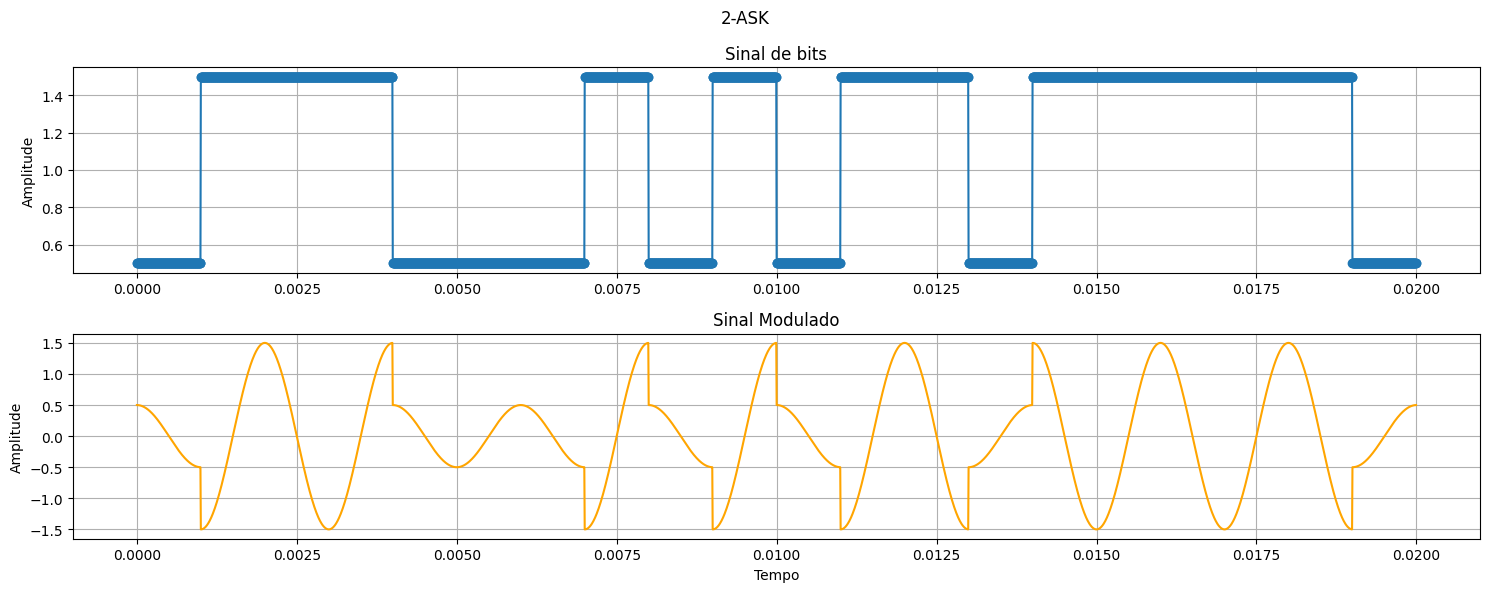

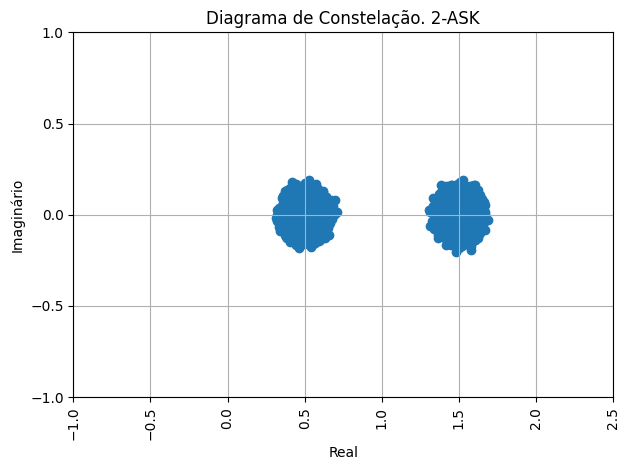

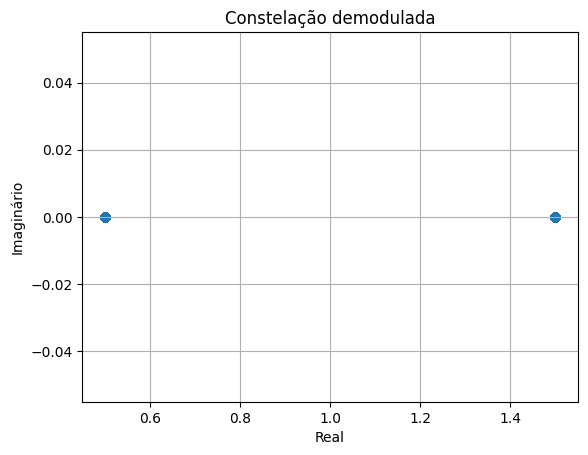

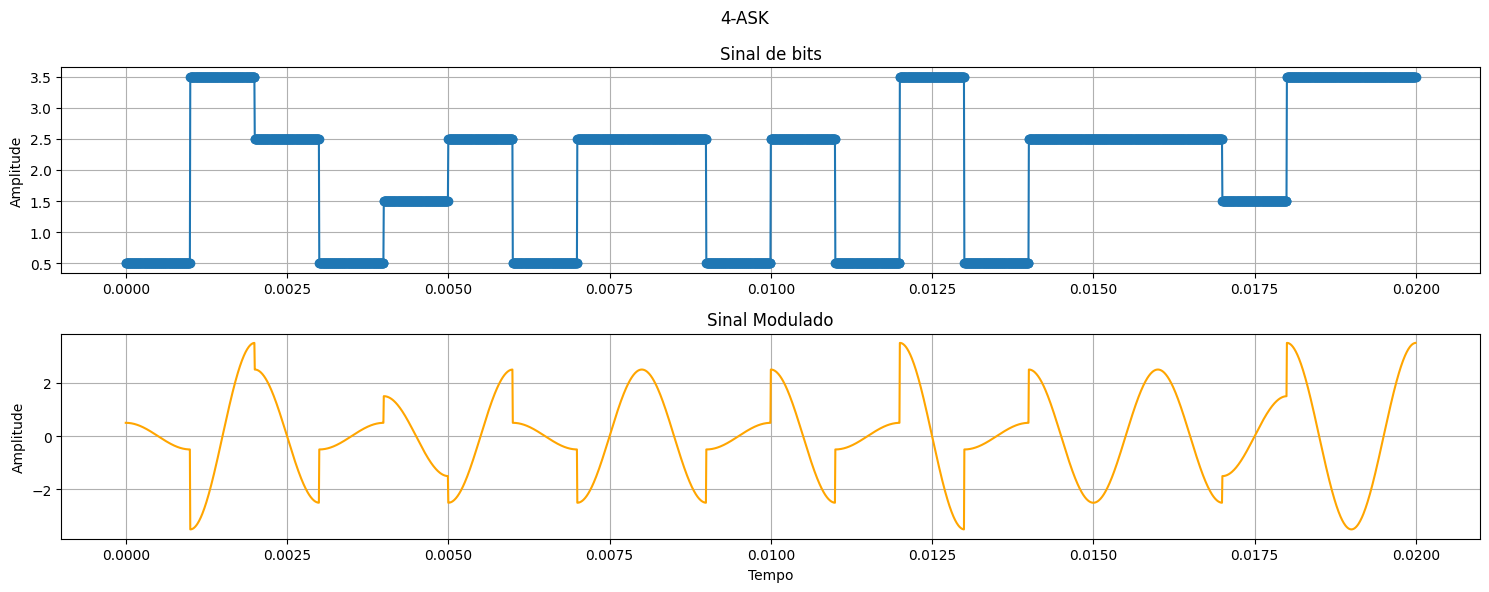

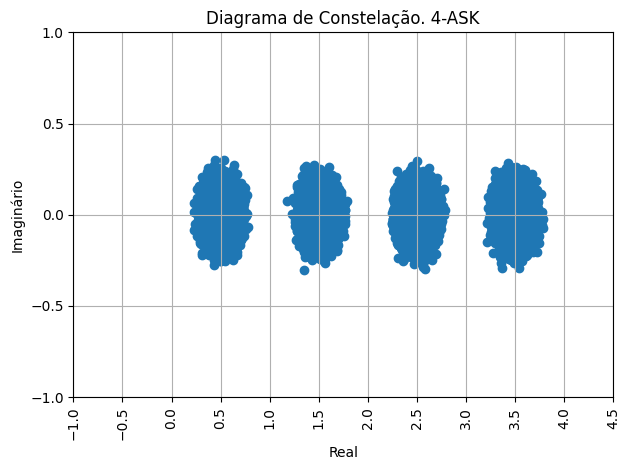

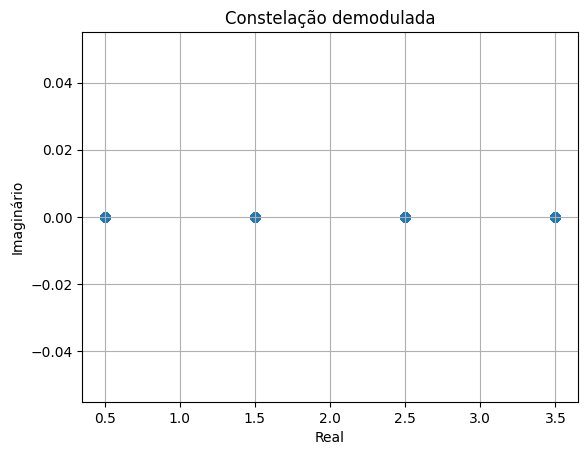

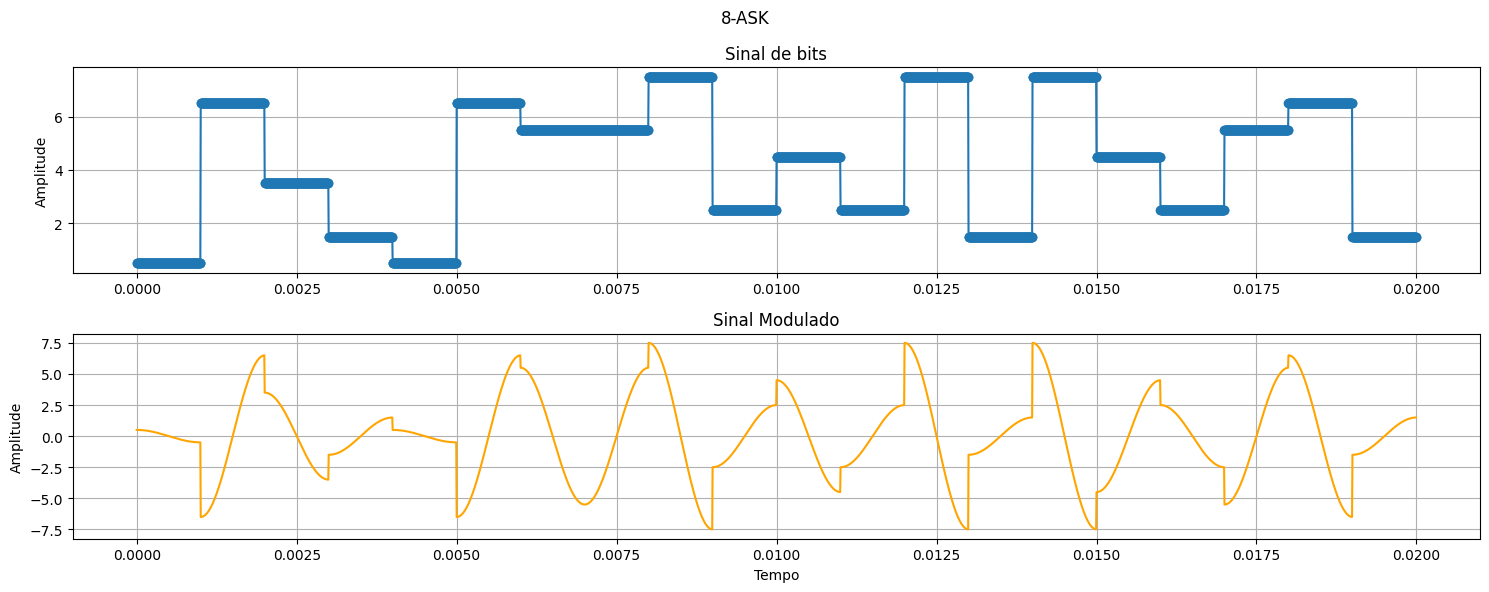

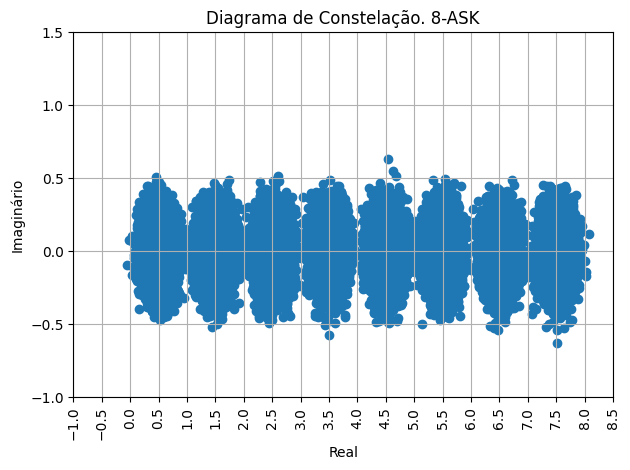

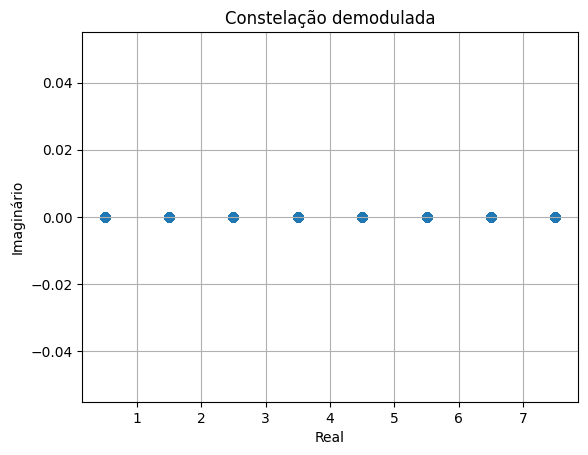

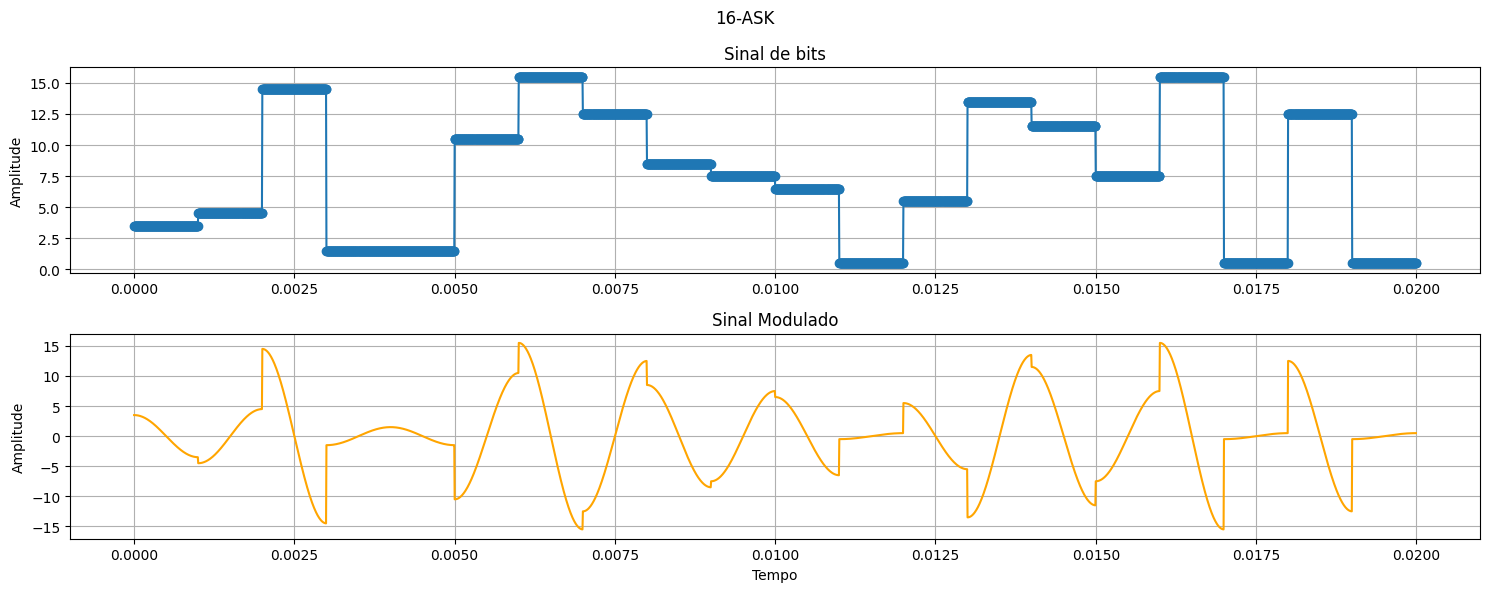

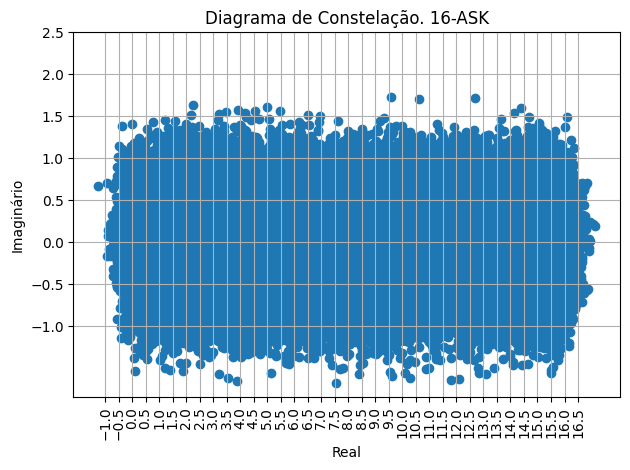

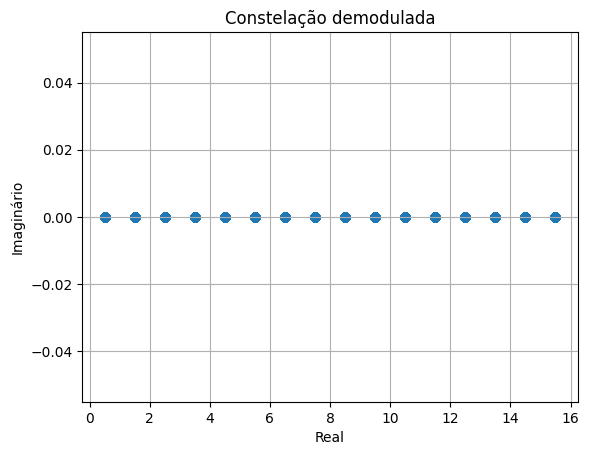

In [7]:
class Ask:
    np.random.seed(40)  # semente para gerar os mesmos números aleatórios

    def __init__(self,portadora,m=2):
        self.amplitudes = lambda x: x+.5 # símbolo:tensão
        self.m = m
        self.portadora = portadora
        self.simbolos = np.random.randint(0,m,n_simbolos)
        self.sinal = np.array([self.amplitudes(s) for s in self.simbolos]) # codifica os símbolos em tensões
        self.sinal = np.repeat(self.sinal,amostras_por_simbolo)
        self.wave = self.sinal*portadora.wave

        self.transmit()
    def show(self):
        """Shows the bit signal and the coded signal in a subplot
        """        
        fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,6))
        
        ax1.plot(tempo[:show_amostras],self.sinal[:show_amostras],marker='o')
        ax2.plot(tempo[:show_amostras],self.wave[:show_amostras],'orange')
        fig.suptitle(f"{self.m}-ASK")
        ax1.set_title("Sinal de bits")
        ax2.set_title("Sinal Modulado")
        ax1.set_ylabel("Amplitude")
        ax2.set_ylabel("Amplitude")
        ax2.set_xlabel("Tempo")
        ax1.grid()
        ax2.grid()
        fig.tight_layout()
        plt.show()

    def constellation(self):
        """Shows the constellation diagram of the signal
        """        
        fig = plt.figure()
        plt.scatter(self.sinal_transmitido.real,self.sinal_transmitido.imag)
        plt.title(f"Diagrama de Constelação. {self.m}-ASK")
        plt.xticks(np.arange(-1,self.m+1,.5),rotation=90)
        plt.yticks(np.arange(-1,np.max(self.sinal_transmitido.imag)+1,.5))
        plt.ylabel("Imaginário")
        plt.xlabel("Real")
        plt.grid()
        fig.tight_layout()
        plt.show()
    def transmit(self,snr = 50):
        #snr = 10*np.log10(potencia(self.sinal)/potencia(ruido))
        k = 10**(snr/10)
        ruido_real = np.random.normal(loc=0.0, scale=2**.5/2, size=len(self.sinal))
        ruido_imag = 1j*np.random.normal(loc=0.0, scale=2**.5/2, size=len(self.sinal))
        ruido = ruido_real+ruido_imag

        es = np.sum(self.sinal**2)
        er = np.sum(ruido**2)
        ruido = ruido * (es / (er * k))**0.5

        self.sinal_transmitido = self.sinal + ruido
# Instancia a classe e mostra o gráfico
for m in 2**np.arange(1,5):
    ask = Ask(portadora,m=m)
    ask.show()
    ask.constellation()
    demod = Demodulador(ask.sinal_transmitido,np.unique(ask.sinal))
    demod.constelacao()

## Demodulador


# D-QPSK


## Modulador

## Demodulador

# M-PSK


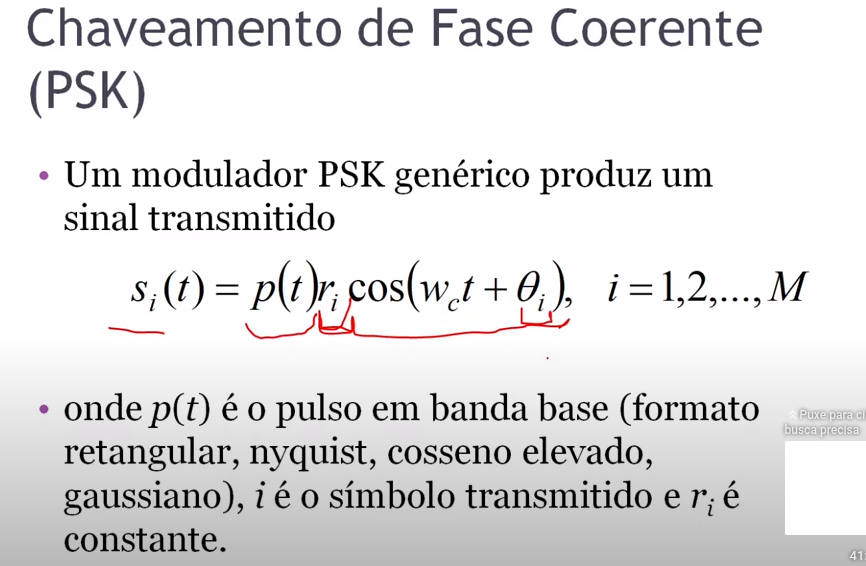


## Modulador


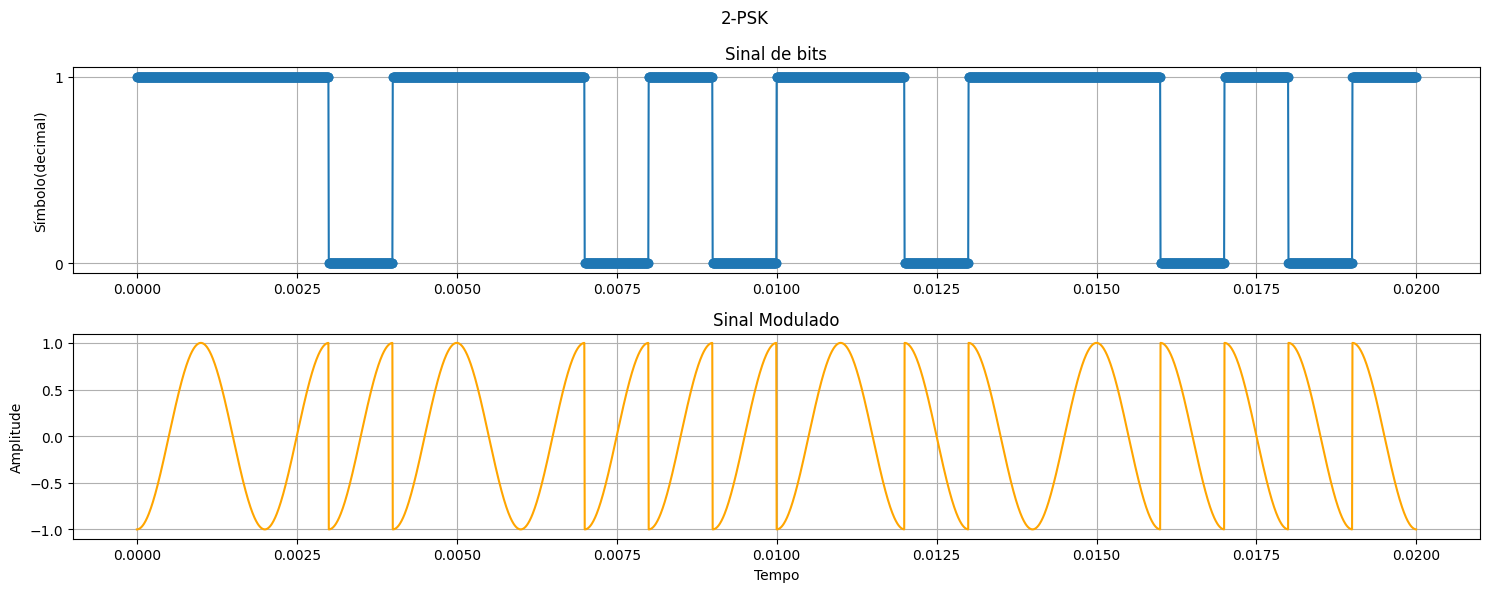

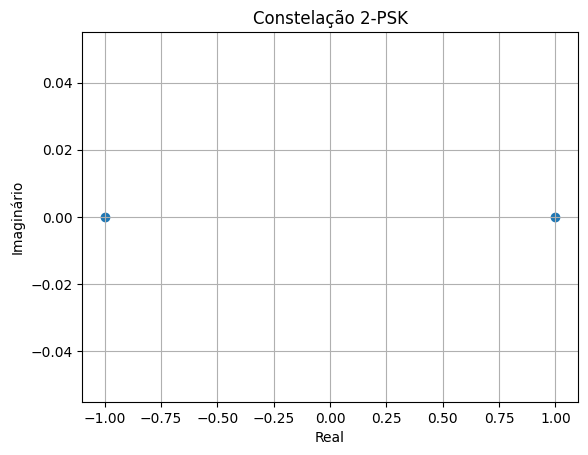

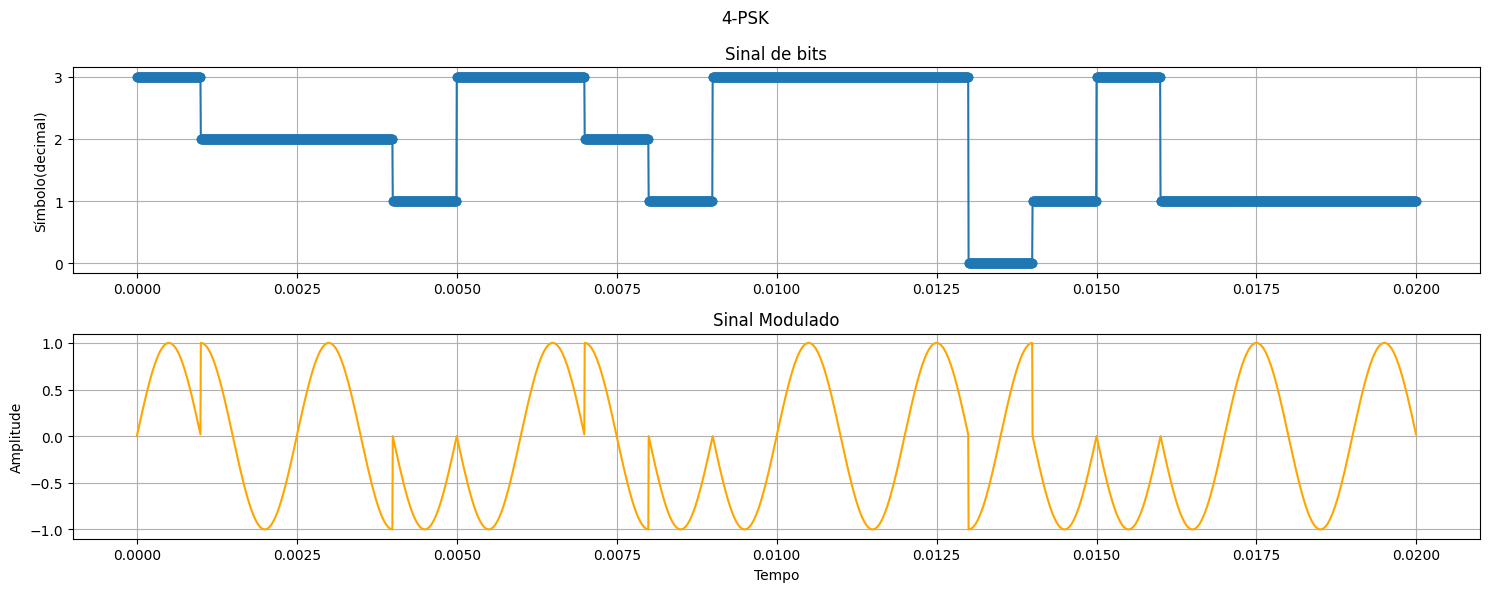

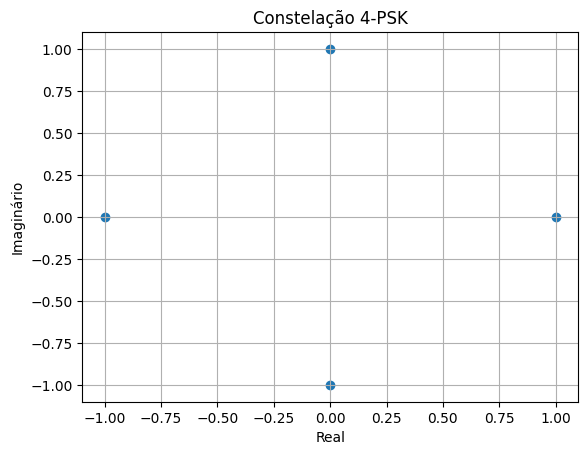

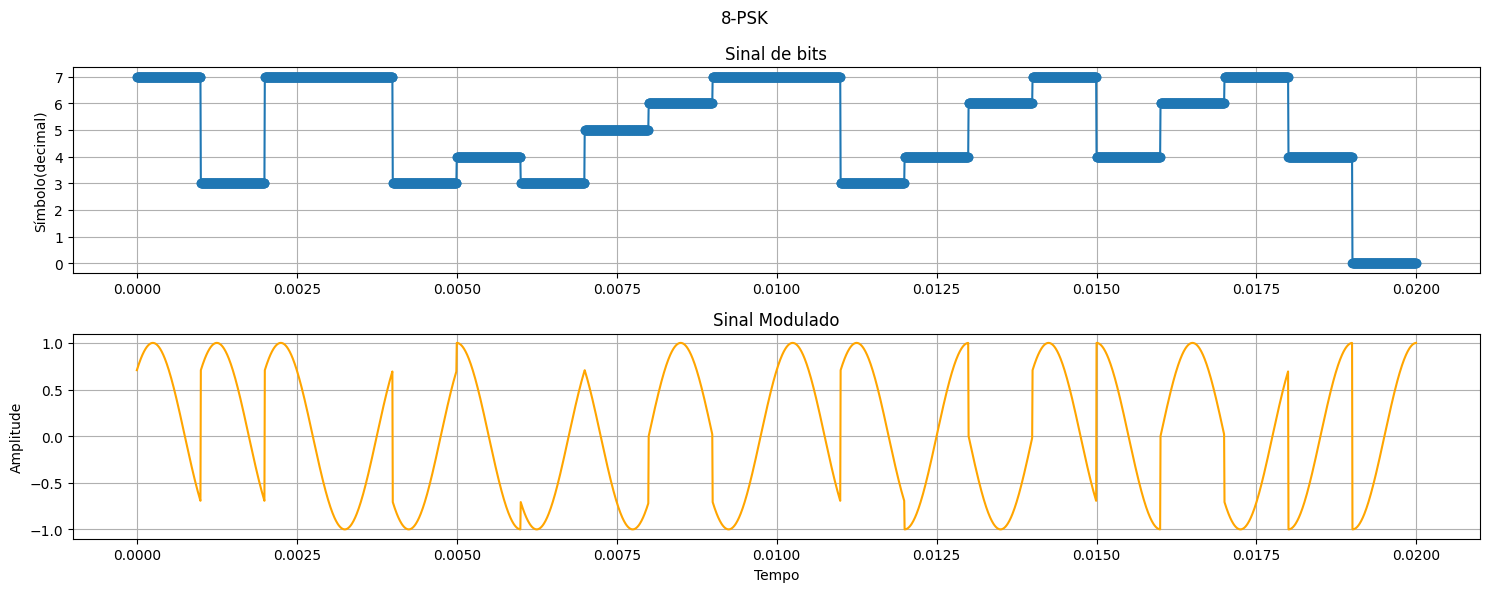

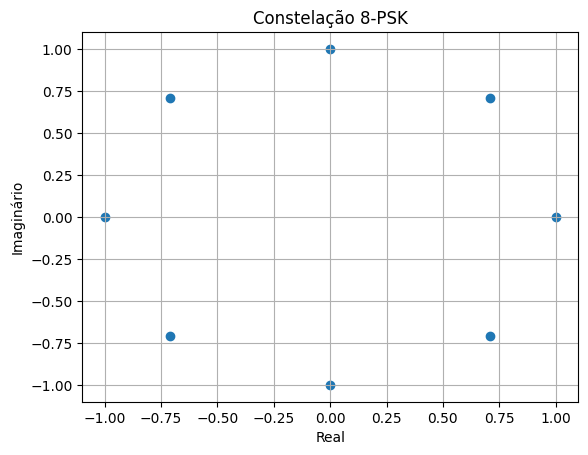

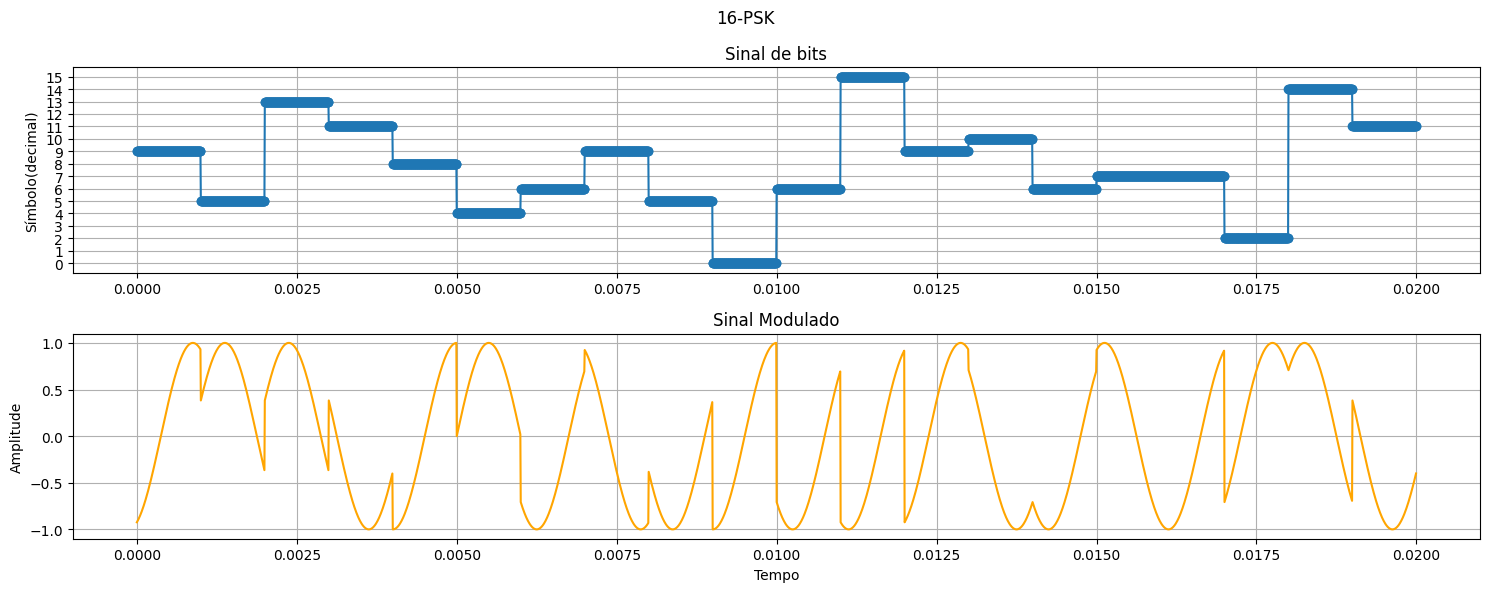

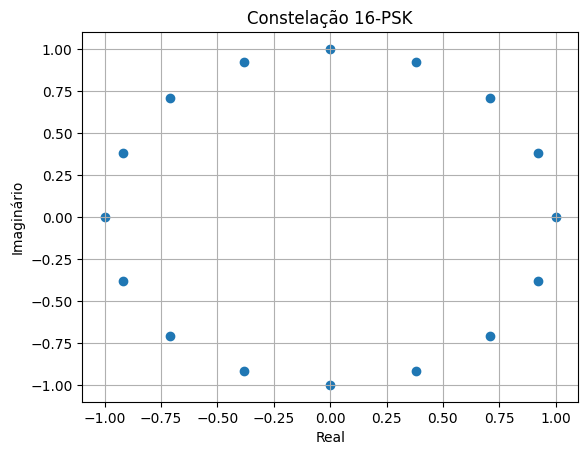

In [26]:
class Psk:
    def __init__(self,portadora,m=2):
        self.fases = np.linspace(0,2*np.pi,m,endpoint=False) # símbolo:fase
        self.portadora = portadora
        self.m= m
        self.simbolos = np.random.randint(0,m,n_simbolos)
        self.simbolos = np.repeat(self.simbolos,amostras_por_simbolo)
        self.sinal = np.cos(frequencia_central*2*np.pi*tempo + self.fases[self.simbolos])
        self.transmit()
    def show(self):
        fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,6))
        
        ax1.plot(tempo[:show_amostras],self.simbolos[:show_amostras],marker='o')
        ax2.plot(tempo[:show_amostras],self.sinal[:show_amostras],'orange')
        fig.suptitle(f"{self.m}-PSK")
        ax1.set_title("Sinal de bits")
        ax2.set_title("Sinal Modulado")
        ax1.set_ylabel("Símbolo(decimal)")
        ax2.set_ylabel("Amplitude")
        ax2.set_xlabel("Tempo")
        ax1.set_yticks(np.arange(self.m))
        ax1.grid()
        ax2.grid()
        fig.tight_layout()
        plt.show()

    def constellation(self):
        data = np.round(self.sinal_transmitido,2)
        plt.scatter(data.real,data.imag)
        plt.grid()
        plt.xlabel('Real')
        plt.ylabel('Imaginário')
        plt.title(f"Constelação {self.m}-PSK")
        plt.show()
    
    def transmit(self):
        ruido = np.random.normal(0, 1, len(self.sinal))
        self.sinal_transmitido = self.sinal + ruido

for m in 2**np.arange(1,5):
    psk = Psk(portadora,m=m)
    psk.show()
    psk.constellation()

        

## Demodulador


# M-QAM


## Modulador


In [10]:
#import product
from itertools import product

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

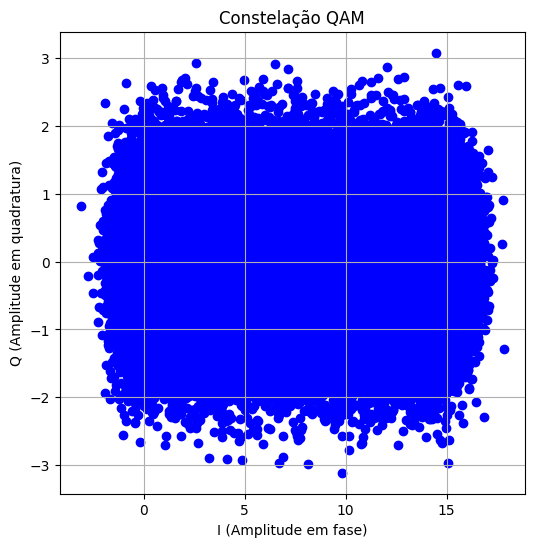

In [14]:
class Qam:

    def __init__(self, amplitudes_I, amplitudes_Q):
        if len(amplitudes_I) != len(amplitudes_Q):
            raise ValueError("As listas de amplitudes I e Q devem ter o mesmo comprimento.")
        
        self.amplitudes_I = amplitudes_I
        self.amplitudes_Q = amplitudes_Q
        self.amplitudes = np.array([complex(ai, aq) for ai, aq in product(amplitudes_I, amplitudes_Q)])
        self.m = m
        self.portadora = portadora
        self.simbolos = np.random.randint(0, m, n_simbolos)
        self.simbolos = np.repeat(self.simbolos, amostras_por_simbolo)
        self.transmit()

    def constellation(self):
        I = self.sinal_transmitido.real
        Q = self.sinal_transmitido.imag
        plt.figure(figsize=(6, 6))
        plt.scatter(I, Q, color='b')
        plt.title("Constelação QAM")
        plt.xlabel("I (Amplitude em fase)")
        plt.ylabel("Q (Amplitude em quadratura)")
        plt.grid(True)
        plt.show()
    
    def transmit(self):
        ruido_real = np.random.normal(0, np.sqrt(2)/2, len(self.simbolos))
        ruido_imag = np.random.normal(0, np.sqrt(2)/2, len(self.simbolos))
        ruido = ruido_real + 1j*ruido_imag
        self.sinal_transmitido = self.simbolos + ruido

qam = Qam([1, 3, 5, 7], [2, 4, 6, 8]) # Ajeitar valores
qam.constellation()

## Demodulador


In [ ]:
qam_demod = Demodulador(qam.sinal_transmitido, qam.amplitudes) # nao conferi